In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import datetime
import seaborn as sns
import os
%matplotlib inline

In [3]:
train=pd.read_csv('train_users_2.csv')
test=pd.read_csv('test_users.csv')

In [4]:
train.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [5]:
test.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


In [6]:
train.shape,test.shape

((213451, 16), (62096, 15))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [9]:
train.shape[0]

213451

In [10]:
train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [11]:
test.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

#### 利用 np.setdiffld()来寻出训练集和测试集之间的不同

In [22]:
train_features=train.columns
test_features=test.columns

np.setdiff1d(train_features,test_features)

array(['country_destination'], dtype=object)

### *分析各个特征

### 1. data_account_created 分析

In [23]:
train.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [39]:
dac_train=train.date_account_created.value_counts()
dac_test=test.date_account_created.value_counts()
dac_train.head

<bound method NDFrame.head of 2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
2014-06-03    602
2014-05-21    602
2014-06-16    598
2014-06-11    593
2014-05-28    590
2014-06-30    590
2014-04-23    587
2014-06-26    587
2014-06-23    586
2014-06-09    577
2014-06-18    564
2014-06-19    564
2014-06-04    562
2014-06-27    557
2014-05-19    556
2014-06-10    555
2014-06-05    550
2014-06-17    548
2014-06-20    544
2014-05-22    543
2014-05-16    534
2014-06-02    534
2014-05-15    530
2014-06-12    524
2014-04-29    519
             ... 
2010-06-26      2
2010-02-03      2
2010-02-18      2
2010-03-28      2
2010-03-04      2
2010-01-21      2
2010-06-12      2
2010-05-29      2
2010-04-08      2
2010-01-30      2
2010-01-16      2
2010-02-04      2
2010-02-07      2
2010-04-16      2
2010-02-17      2
2010-02-08      2
2010-01-08      1
2010-01-02      1
2010-01-01      1
2010-06-18      1
2010-01-03      1
2010-04-01      1
2010-01-19      

In [27]:
print(dac_train.describe())
print('\n'+'***'*10+'\n')
print(dac_test.describe())

count    1634.000000
mean      130.630967
std       139.327895
min         1.000000
25%        15.000000
50%        79.000000
75%       201.000000
max       674.000000
Name: date_account_created, dtype: float64

******************************

count      92.000000
mean      674.956522
std       122.568116
min       401.000000
25%       606.750000
50%       662.000000
75%       739.000000
max      1105.000000
Name: date_account_created, dtype: float64


In [29]:
print ("training dataset:")
print (dac_train.head(5))
print (dac_train.tail(5))
print('\n'+'***'*10+'\n')
print ( "\n\ntest dataset:")
print (dac_test.head(5))
print (dac_test.tail(5))

training dataset:
2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
Name: date_account_created, dtype: int64
2010-01-23    1
2010-03-09    1
2010-04-11    1
2010-02-14    1
2010-04-24    1
Name: date_account_created, dtype: int64

******************************



test dataset:
2014-07-23    1105
2014-07-22    1052
2014-07-17     978
2014-07-24     923
2014-07-18     892
Name: date_account_created, dtype: int64
2014-07-06    475
2014-07-12    472
2014-07-04    445
2014-07-05    421
2014-07-13    401
Name: date_account_created, dtype: int64


#### 1.1 观察下时间信息，并且把时间改成datetime格式

In [31]:
dac_train_date=pd.to_datetime(dac_train.index)
dac_test_date=pd.to_datetime(dac_test.index)

print('the date of training dataset is: {} to {}'.format(dac_train_date.min(),
                                                         dac_train_date.max()))
print('the date of training dataset is: {} to {}'.format(dac_test_date.min(),
                                                         dac_test_date.max()))

the date of training dataset is: 2010-01-01 00:00:00 to 2014-06-30 00:00:00
the date of training dataset is: 2014-07-01 00:00:00 to 2014-09-30 00:00:00


In [35]:
dac_train_day = dac_train_date - dac_train_date.min()
dac_test_day = dac_test_date - dac_train_date.min()
dac_train_day

TimedeltaIndex(['1593 days', '1635 days', '1636 days', '1600 days',
                '1594 days', '1614 days', '1601 days', '1627 days',
                '1622 days', '1608 days',
                ...
                   '2 days',   '90 days',   '18 days',   '30 days',
                  '27 days',   '22 days',   '67 days',  '100 days',
                  '44 days',  '113 days'],
               dtype='timedelta64[ns]', length=1634, freq=None)

In [41]:
dac_train_day.max()

Timedelta('1641 days 00:00:00')

In [38]:
dac_train_day.days

Int64Index([1593, 1635, 1636, 1600, 1594, 1614, 1601, 1627, 1622, 1608,
            ...
               2,   90,   18,   30,   27,   22,   67,  100,   44,  113],
           dtype='int64', length=1634)

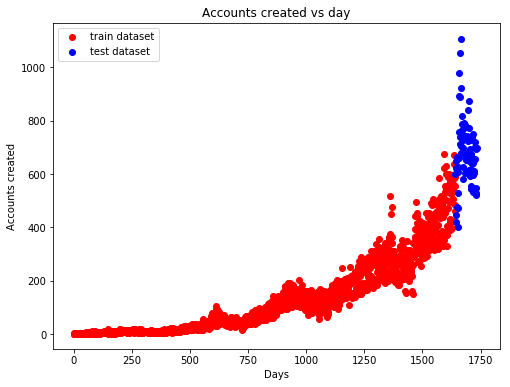

In [44]:
plt.figure(figsize=[8,6])
plt.scatter(dac_train_day.days,dac_train.values,color='r',label='train dataset')
plt.scatter(dac_test_day.days,dac_test.values,color='b',label='test dataset')

plt.title("Accounts created vs day")
plt.xlabel("Days")
plt.ylabel("Accounts created")
plt.legend(loc = 'upper left')


In [45]:
start_date=dac_train_date.min()
start_date

Timestamp('2010-01-01 00:00:00')

### 2. timestamp_first_active

In [47]:
tfa_train=train.timestamp_first_active.value_counts()
tfa_test=test.timestamp_first_active.value_counts()

tfa_train.unique()

array([1], dtype=int64)

In [53]:
train.timestamp_first_active.head(5)

0    20090319043255
1    20090523174809
2    20090609231247
3    20091031060129
4    20091208061105
Name: timestamp_first_active, dtype: int64

#### 2.1 把int型的数字转化为datetime格式

In [61]:
tfa_train_dt=train.timestamp_first_active.astype(str).\
apply(lambda x: datetime.datetime.strptime(x,'%Y%m%d%H%M%S'))

In [63]:
tfa_train_dt.head()

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active, dtype: datetime64[ns]

In [64]:
tfa_train_dt.describe()

count                  213451
unique                 213451
top       2013-07-01 05:26:34
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24
Name: timestamp_first_active, dtype: object

In [65]:
train.date_first_booking.dtypes

dtype('O')

### 3. date_first_booking

In [66]:
dfb_train=train.date_first_booking
dfb_test=test.date_first_booking

In [68]:
dfb_train.isnull().sum()

124543

In [69]:
dfb_train.describe()

count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object

In [73]:
dfb_test.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: date_first_booking, dtype: float64

***The date_first_booking feature for test dataset are all nan. We can drop this feature when building the model.***

### 3. Age

In [74]:
train.age.isnull().sum()

87990

In [75]:
print (train[train.age < 15].age.shape)

print (train[train.age > 80].age.shape)

print (test[test.age < 15].age.shape)

print (test[test.age > 80].age.shape)

(57,)
(2771,)
(2,)
(417,)


In [76]:
train[train.age>117].age.shape

(781,)

In [78]:
train.age.value_counts().head()

30.0    6124
31.0    6016
29.0    5963
28.0    5939
32.0    5855
Name: age, dtype: int64

In [82]:
train.age.value_counts().shape

(127,)

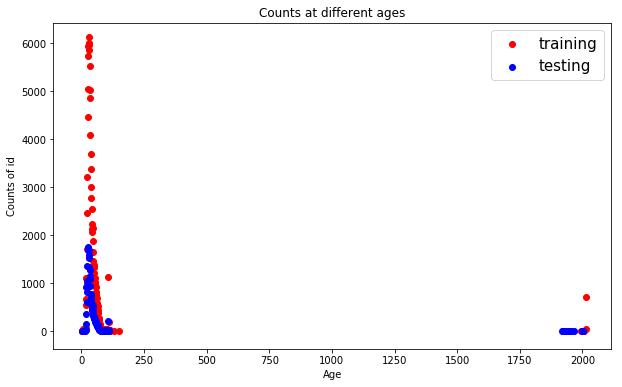

In [86]:
plt.figure(figsize=[10,6])
plt.scatter(train.age.value_counts().index, train.age.value_counts().values,color='r',label='training')
plt.scatter(test.age.value_counts().index, test.age.value_counts().values,color='b',label='testing')

plt.title("Counts at different ages")
plt.xlabel("Age")
plt.ylabel("Counts of id")
plt.legend(loc = 'upper right', fontsize = 15)


In [87]:
train.query('age<15').age.shape

(57,)

In [94]:
age_train=[train[train.age.isnull()].age.shape[0],
           train.query('age<15').age.shape[0],
           train.query('age >= 15 & age <= 90').age.shape[0],
           train.query('age > 90').age.shape[0]]
          
age_test = [test[test.age.isnull()].age.shape[0],
            test.query('age < 15').age.shape[0],
            test.query("age >= 15 & age <= 90").age.shape[0],
            test.query('age > 90').age.shape[0]]
columns = ['Null', 'age < 15', 'age', 'age > 90']

In [93]:
age_test,age_train

([28876, 2, 32833, 385], [87990, 57, 122861, 2543])

Text(0,0.5,'counts')

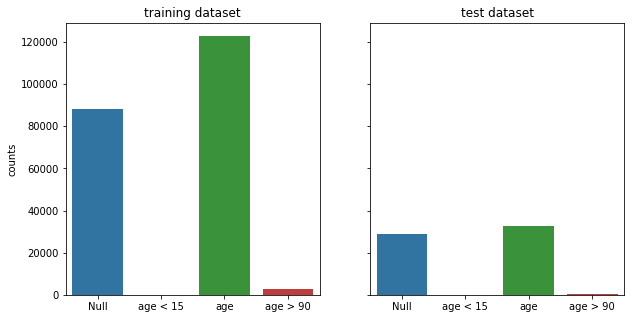

In [104]:
fig,(ax1,ax2)=plt.subplots(1,2,sharex=True,sharey=True,figsize=[10,5])

sns.barplot(columns,age_train,ax=ax1)
sns.barplot(columns,age_test,ax=ax2)

ax1.set_title('training dataset')
ax2.set_title('test dataset')
ax1.set_ylabel('counts')

#### Categorical features: gender, signup_method, etc...

In [105]:
ohe_feats = ['gender', 
             'signup_method', 
             'signup_flow', 
             'language', 
             'affiliate_channel', 
             'affiliate_provider', 
             'first_affiliate_tracked', 
             'signup_app', 
             'first_device_type', 
             'first_browser']

In [107]:
def feature_barplot(feature,df_train=train,df_test=test,figsize=(10,5),rot=90,saveimg=False):
    
    feat_train=df_train[feature].value_counts()
    feat_test=df_test[feature].value_counts()
    
    fig_feature,(ax1,ax2)=plt.subplots(1,2,sharex=True, sharey = True, figsize = figsize)
    
    sns.barplot(feat_train.index,feat_train.values,ax=ax1)
    sns.barplot(feat_test.index,feat_test.values,ax=ax2)
    
    ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation = rot)
    ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation = rot)
    
    ax1.set_title(feature + ' of training dataset')
    ax2.set_title(feature + ' of test dataset')
    ax1.set_ylabel('Counts')
    
    plt.tight_layout()
    
    if saveimg == True:
        figname = feature + ".png"
        fig_feature.savefig(figname, dpi = 75)
    

### gender

In [108]:
train.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

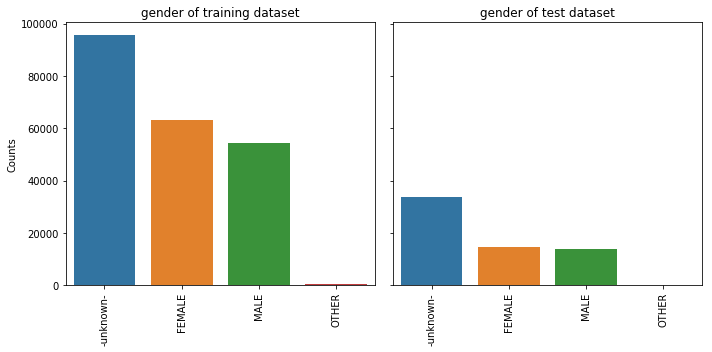

In [110]:
feature_barplot('gender')

#### signup_method

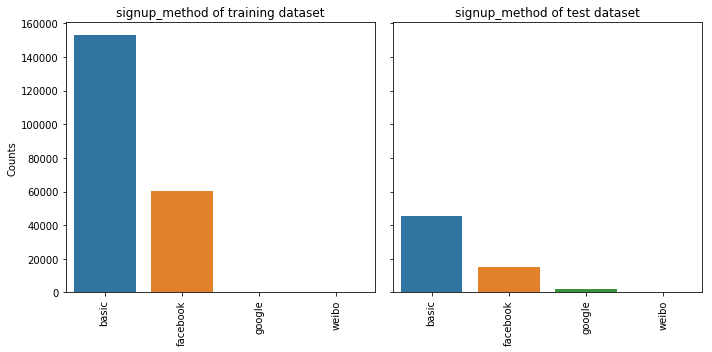

In [111]:
feature_barplot('signup_method')

#### Barplot for all the ohe_features

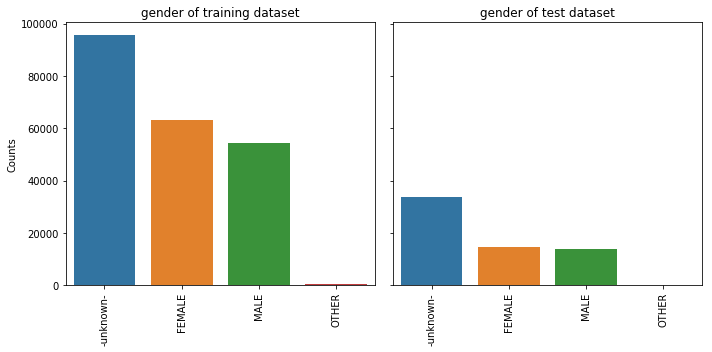

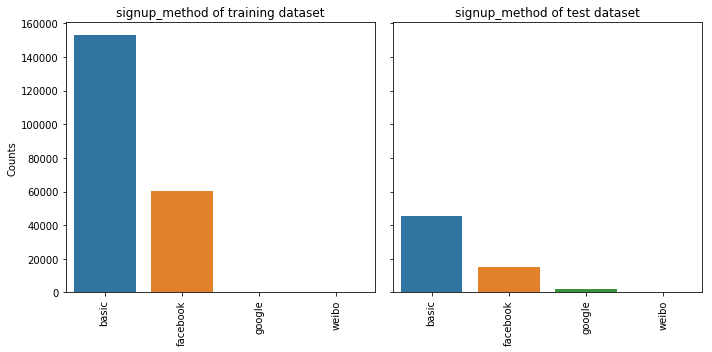

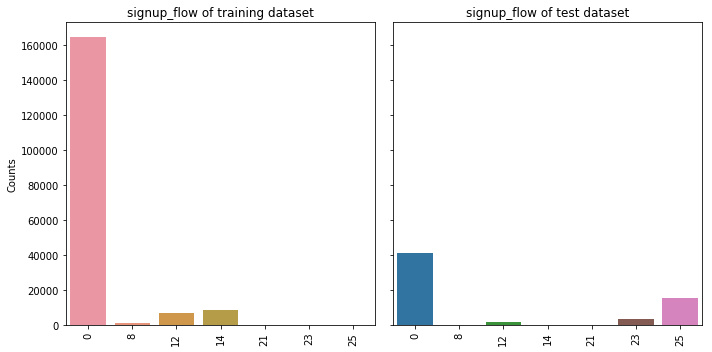

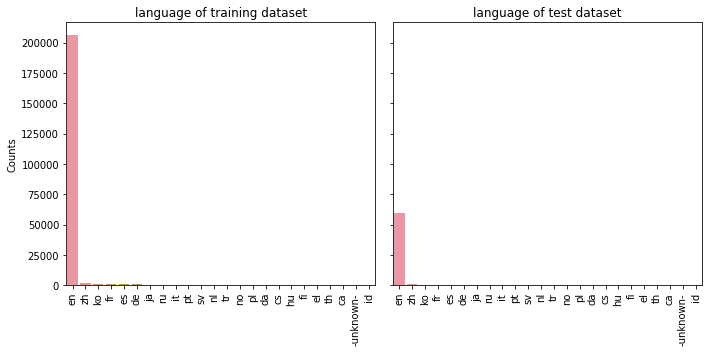

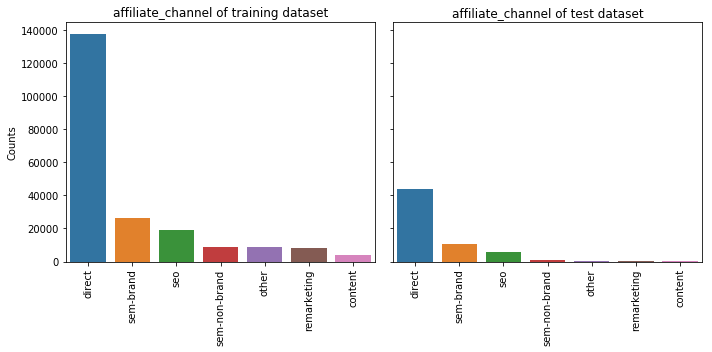

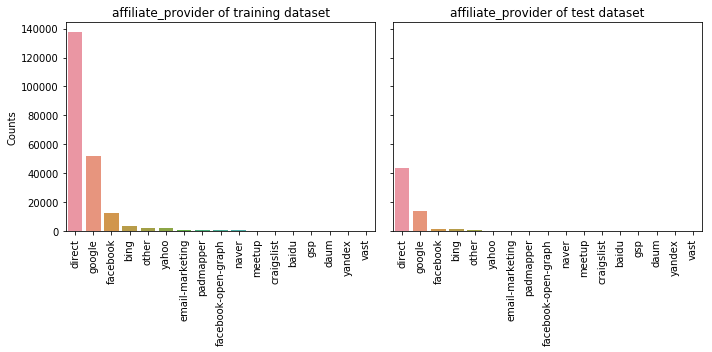

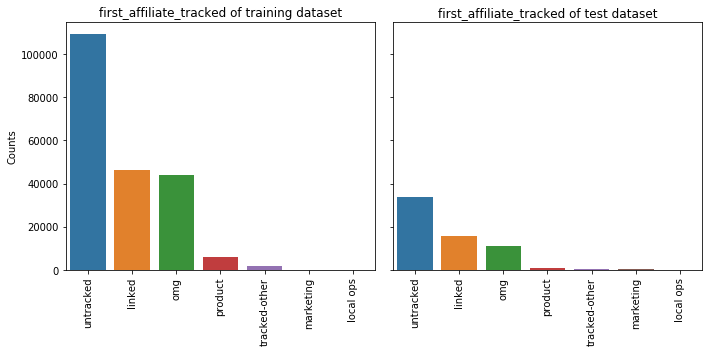

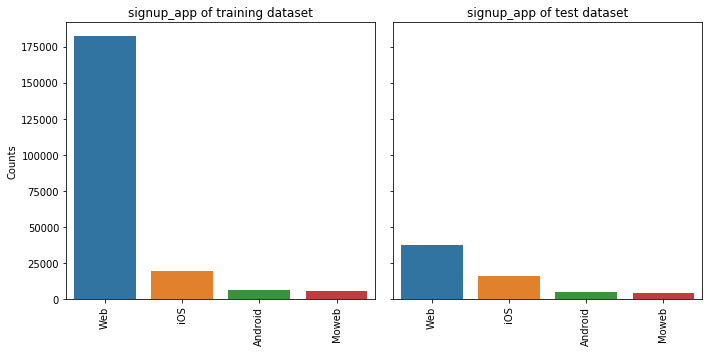

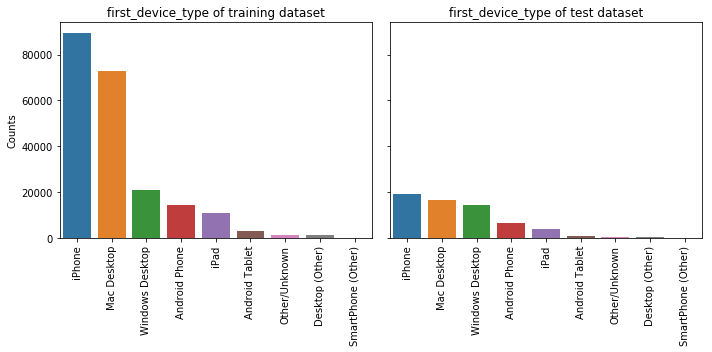

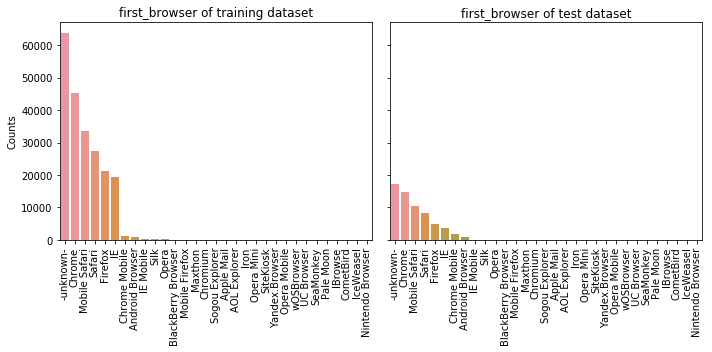

In [112]:
for feat in ohe_feats:
    feature_barplot(feature=feat)

#### first_affiliate_tracked: missing value inside

In [113]:
train.first_affiliate_tracked.isnull().sum()

6065

In [114]:
test.first_affiliate_tracked.isnull().sum()

20